In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meirnizri/covid19-dataset

covid19-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q covid19-dataset.zip

replace Covid Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
!ls

 covid19-dataset.zip  'Covid Data.csv'	 sample_data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('Covid Data.csv')


# Data Preprocessing

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
cols = list(data.columns)
columns = [c.lower() for c in cols]

data.set_axis(columns, axis=1, inplace=True)
data.columns

<ipython-input-5-aaba687fe6e8>:4: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(columns, axis=1, inplace=True)


Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

In [ ]:
data.describe()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
def set_null_values(value):
  if value in [97, 98, 99]:
    return np.NaN
  return value

for col in data.columns:
    data[col] = data[col].apply(set_null_values)

In [ ]:
data.isnull().sum()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
date_died                    0
intubed                 855869
pneumonia                16003
age                        345
pregnant                527265
diabetes                  3338
copd                      3003
asthma                    2979
inmsupr                   3404
hipertension              3104
other_disease             5045
cardiovascular            3076
obesity                   3032
renal_chronic             3006
tobacco                   3220
clasiffication_final         0
icu                     856032
dtype: int64

In [ ]:
def cal_missing_values(data):

  columns = data.columns
  null_pctg = dict.fromkeys(columns, 0)

  n_rows = data.shape[0]
  for col in columns:
    col_null_pctg = (data[col].isnull().sum() / n_rows) * 100
    null_pctg[col] = col_null_pctg

  return pd.DataFrame.from_dict(null_pctg, orient='index')

cal_missing_values(data)

,0
usmer,0.000000
medical_unit,0.000000
sex,0.000000
patient_type,0.000000
date_died,0.000000
intubed,81.622106
pneumonia,1.526166
age,0.032902
pregnant,50.283957
diabetes,0.318337


In [ ]:
# Drop the Columns that have more than 50% Null Values
data.drop(['intubed', 'icu', 'pregnant'], axis=1, inplace=True)

In [ ]:
# Drop the Rows With Missing Values
data.dropna(axis=0, inplace=True)

In [ ]:
# Create a new variable to see if the patient died
def if_died(date_died):
    if date_died != '9999-99-99':
        return 'died'
    else:
        return 'alive'

data['died'] = data['date_died'].apply(if_died)
data['died'].value_counts()

alive    950217
died      74612
Name: died, dtype: int64

In [ ]:
def covid_degree(value):
  if value >= 4:
    return 'No Covid'
  else:
    return f'Degree {value}'

data['clasiffication_final'] = data['clasiffication_final'].apply(covid_degree)
data['clasiffication_final'].value_counts()

No Covid    636077
Degree 3    378510
Degree 1      8443
Degree 2      1799
Name: clasiffication_final, dtype: int64

In [ ]:
sex_map = {1: 'Female', 2: 'Male'}
data['sex'] = data['sex'].map(sex_map)
data['sex'].value_counts()

Female    513034
Male      511795
Name: sex, dtype: int64

In [ ]:
type_map = {1: 'Returned Home', 2: 'Hospitalized'}
data['patient_type'] = data['patient_type'].map(type_map)
data['patient_type'].value_counts()

Returned Home    833100
Hospitalized     191729
Name: patient_type, dtype: int64

In [ ]:
columns = [
    'usmer', 'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
    'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco'
]

def replace_values(value):
    if value == 1:
        return 'Yes'
    elif value == 2:
        return 'No'
    return value

for col in columns:
    data[col] = data[col].apply(replace_values)

In [ ]:
data.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,No,1,Female,Returned Home,03/05/2020,Yes,65.0,No,No,No,No,Yes,No,No,No,No,No,Degree 3,died
1,No,1,Male,Returned Home,03/06/2020,Yes,72.0,No,No,No,No,Yes,No,No,Yes,Yes,No,No Covid,died
2,No,1,Male,Hospitalized,09/06/2020,No,55.0,Yes,No,No,No,No,No,No,No,No,No,Degree 3,died
3,No,1,Female,Returned Home,12/06/2020,No,53.0,No,No,No,No,No,No,No,No,No,No,No Covid,died
4,No,1,Male,Returned Home,21/06/2020,No,68.0,Yes,No,No,No,Yes,No,No,No,No,No,Degree 3,died


In [ ]:
data['died'].isnull().sum()

0

# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

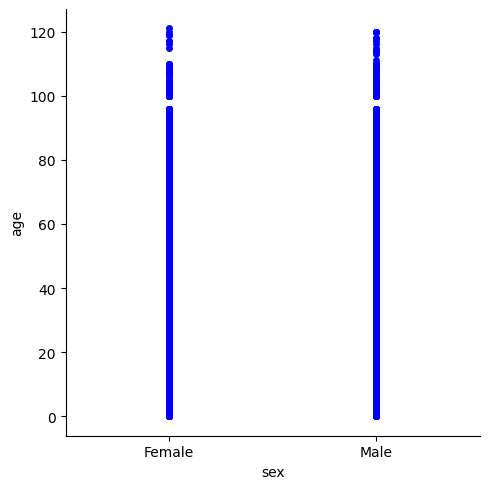

In [ ]:
sb.catplot(data=data, x='sex', y='age', jitter=False, color='blue')

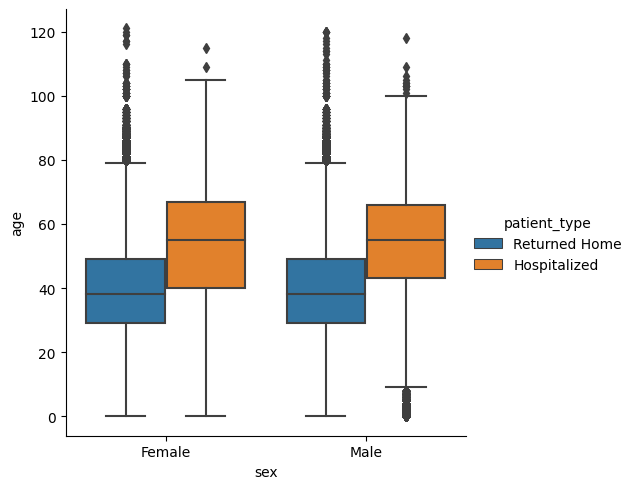

In [ ]:
sb.catplot(data=data, x='sex', y='age', hue='patient_type', kind='box')

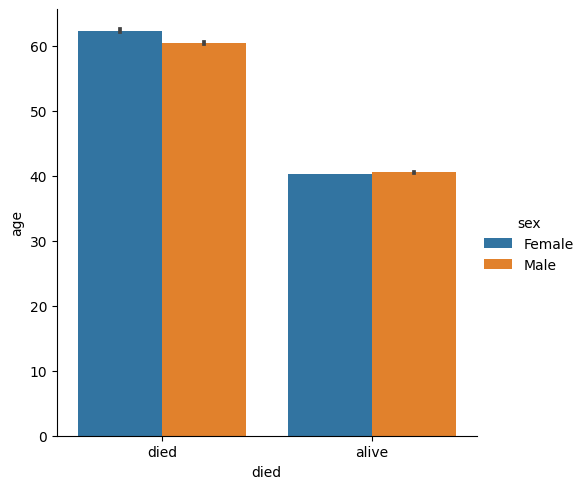

In [ ]:
sb.catplot(data=data, x='died', y='age', kind='bar', hue='sex')

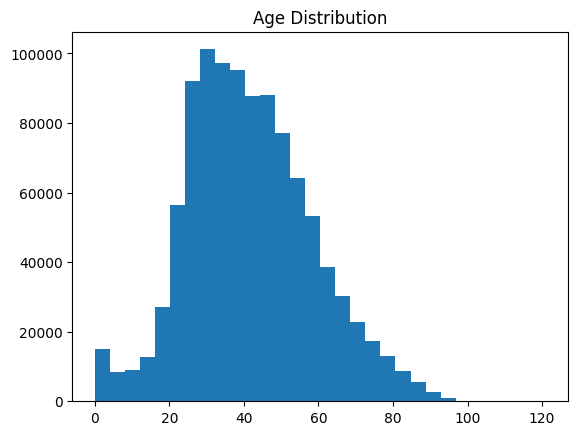

In [ ]:
plt.hist(data['age'], bins=30)
plt.title('Age Distribution')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024829 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   usmer                 1024829 non-null  object 
 1   medical_unit          1024829 non-null  int64  
 2   sex                   1024829 non-null  object 
 3   patient_type          1024829 non-null  object 
 4   date_died             1024829 non-null  object 
 5   pneumonia             1024829 non-null  object 
 6   age                   1024829 non-null  float64
 7   diabetes              1024829 non-null  object 
 8   copd                  1024829 non-null  object 
 9   asthma                1024829 non-null  object 
 10  inmsupr               1024829 non-null  object 
 11  hipertension          1024829 non-null  object 
 12  other_disease         1024829 non-null  object 
 13  cardiovascular        1024829 non-null  object 
 14  obesity               1024829 non-

In [ ]:
data['date_died']

0          03/05/2020
1          03/06/2020
2          09/06/2020
3          12/06/2020
4          21/06/2020
              ...    
1048570    9999-99-99
1048571    9999-99-99
1048572    9999-99-99
1048573    9999-99-99
1048574    9999-99-99
Name: date_died, Length: 1024829, dtype: object

In [ ]:
filtered_df = data.loc[(data['date_died'] != "9999-99-99")]
filtered_df

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,No,1,Female,Returned Home,03/05/2020,Yes,65.0,No,No,No,No,Yes,No,No,No,No,No,Degree 3,died
1,No,1,Male,Returned Home,03/06/2020,Yes,72.0,No,No,No,No,Yes,No,No,Yes,Yes,No,No Covid,died
2,No,1,Male,Hospitalized,09/06/2020,No,55.0,Yes,No,No,No,No,No,No,No,No,No,Degree 3,died
3,No,1,Female,Returned Home,12/06/2020,No,53.0,No,No,No,No,No,No,No,No,No,No,No Covid,died
4,No,1,Male,Returned Home,21/06/2020,No,68.0,Yes,No,No,No,Yes,No,No,No,No,No,Degree 3,died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047635,Yes,13,Male,Hospitalized,18/07/2020,Yes,73.0,No,No,No,No,Yes,No,No,Yes,No,No,Degree 3,died
1047636,Yes,13,Male,Returned Home,26/07/2020,Yes,82.0,No,Yes,No,No,Yes,No,No,No,No,No,Degree 3,died
1047637,Yes,13,Female,Returned Home,27/07/2020,Yes,82.0,No,No,No,No,No,No,No,No,No,No,Degree 3,died
1047638,Yes,13,Male,Hospitalized,29/07/2020,Yes,80.0,No,No,No,No,No,No,No,Yes,No,No,Degree 3,died


In [ ]:
filtered_df['date_died'] = pd.to_datetime(filtered_df['date_died'])

<ipython-input-27-cdeeb72dafaf>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  filtered_df['date_died'] = pd.to_datetime(filtered_df['date_died'])
<ipython-input-27-cdeeb72dafaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date_died'] = pd.to_datetime(filtered_df['date_died'])


In [ ]:
filtered_df['date_died']

0         2020-03-05
1         2020-03-06
2         2020-09-06
3         2020-12-06
4         2020-06-21
             ...    
1047635   2020-07-18
1047636   2020-07-26
1047637   2020-07-27
1047638   2020-07-29
1047639   2020-07-29
Name: date_died, Length: 74612, dtype: datetime64[ns]

In [ ]:
filtered_df['Year'] = filtered_df['date_died'].dt.strftime('%Y')

<ipython-input-29-7c22eb8945e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['date_died'].dt.strftime('%Y')


In [ ]:
filtered_df['Year'].value_counts()

2020    74302
2021      310
Name: Year, dtype: int64

[Text(0.5, 1.0, 'Number of people died during the Covid period')]

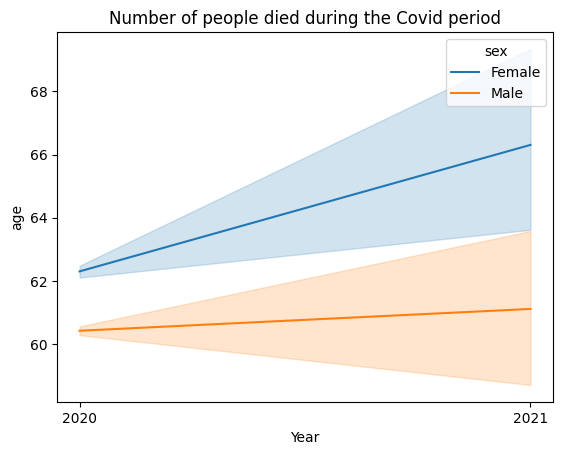

In [ ]:
sb.lineplot(data=filtered_df, x='Year', y='age', hue='sex').set(title='Number of people died during the Covid period')

In [ ]:
filtered_df['Month'] = filtered_df['date_died'].dt.strftime('%m')

<ipython-input-32-053666480e17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['date_died'].dt.strftime('%m')


In [ ]:
filtered_df.sort_values(by=['Month'],ascending=True, inplace=True)

<ipython-input-33-eb0ac6add939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_values(by=['Month'],ascending=True, inplace=True)


[Text(0.5, 1.0, 'Males & Females Died during the entire 2 years of Covid')]

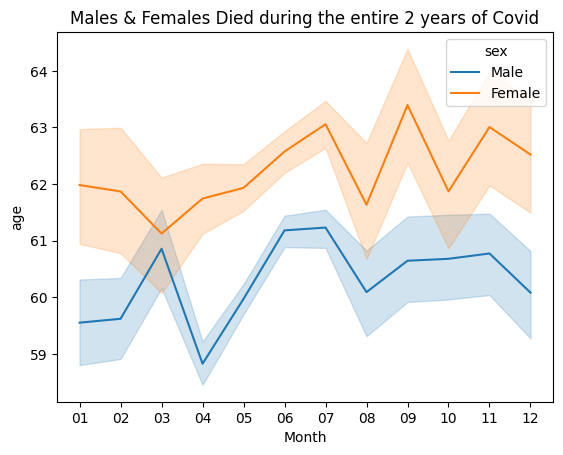

In [ ]:
sb.lineplot(data=filtered_df, x='Month', y='age', hue='sex').set(title='Males & Females Died during the entire 2 years of Covid')

In [ ]:
data['medical_unit'].value_counts()

12    591661
4     307075
6      37840
9      37360
3      18656
8      10090
10      7541
5       7057
11      5556
7        871
13       812
2        159
1        151
Name: medical_unit, dtype: int64

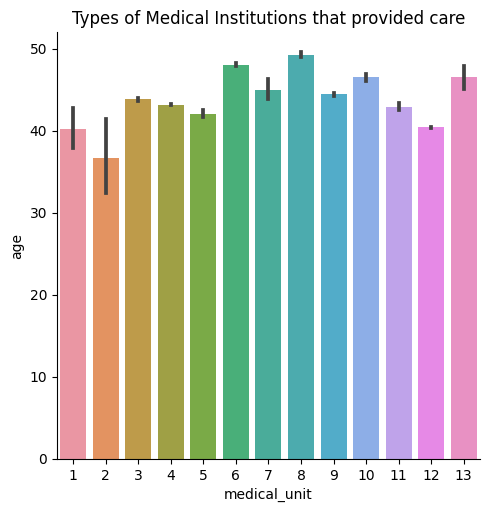

In [ ]:
sb.catplot(data=data, x='medical_unit', y='age', kind='bar').set(title='Types of Medical Institutions that provided care')

<Axes: title={'center': 'No.of patients treated by different Medical Institutions'}>

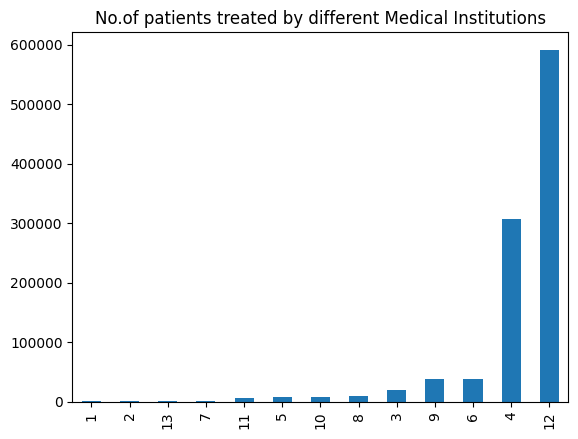

In [ ]:
data['medical_unit'].value_counts(ascending=True).plot(kind='bar', title='No.of patients treated by different Medical Institutions')

In [ ]:
data.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,No,1,Female,Returned Home,03/05/2020,Yes,65.0,No,No,No,No,Yes,No,No,No,No,No,Degree 3,died
1,No,1,Male,Returned Home,03/06/2020,Yes,72.0,No,No,No,No,Yes,No,No,Yes,Yes,No,No Covid,died
2,No,1,Male,Hospitalized,09/06/2020,No,55.0,Yes,No,No,No,No,No,No,No,No,No,Degree 3,died
3,No,1,Female,Returned Home,12/06/2020,No,53.0,No,No,No,No,No,No,No,No,No,No,No Covid,died
4,No,1,Male,Returned Home,21/06/2020,No,68.0,Yes,No,No,No,Yes,No,No,No,No,No,Degree 3,died


In [ ]:
pd.crosstab(data['patient_type'], data['sex'])

sex,Female,Male
patient_type,,
Hospitalized,78027,113702
Returned Home,435007,398093


In [ ]:
pd.crosstab(data['died'], data['diabetes'])

diabetes,No,Yes
died,,
alive,855515,94702
died,46947,27665


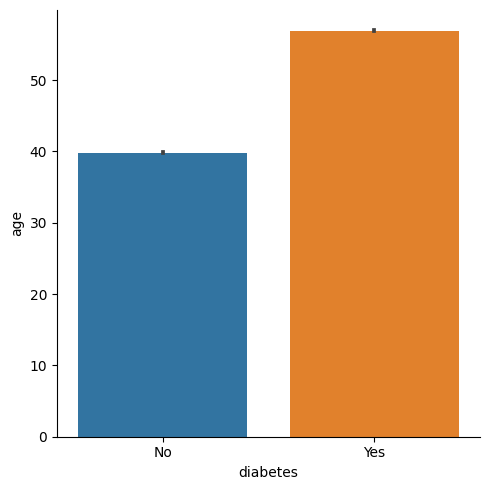

In [ ]:
sb.catplot(data=data, x='diabetes', y='age', kind='bar')

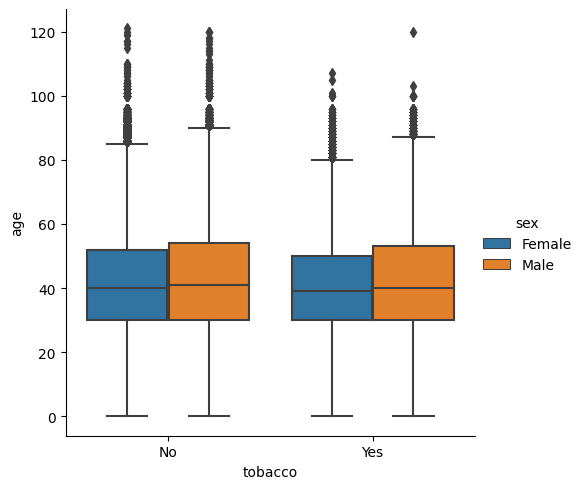

In [ ]:
sb.catplot(data=data, x='tobacco', y='age', kind='box', hue='sex')

In [ ]:
pd.crosstab(data['tobacco'], data['sex'])

sex,Female,Male
tobacco,,
No,485882,456296
Yes,27152,55499


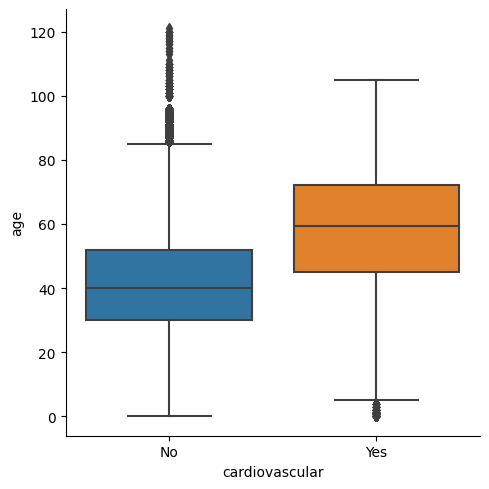

In [ ]:
sb.catplot(data=data, x='cardiovascular', y='age', kind='box')

In [ ]:
pd.crosstab(data['sex'], data['clasiffication_final'])

clasiffication_final,Degree 1,Degree 2,Degree 3,No Covid
sex,,,,
Female,3951,644,176619,331820
Male,4492,1155,201891,304257


In [ ]:
pd.crosstab(data['pneumonia'], data['sex'])

sex,Female,Male
pneumonia,,
No,458191,429149
Yes,54843,82646


In [ ]:
pd.crosstab([data['patient_type'], data['died']], data['diabetes'])

diabetes                 No    Yes
patient_type  died                
Hospitalized  alive   92945  30838
              died    42565  25381
Returned Home alive  762570  63864
              died     4382   2284

In [ ]:
pd.crosstab(data['hipertension'], data['sex'])

sex,Female,Male
hipertension,,
No,433860,431521
Yes,79174,80274


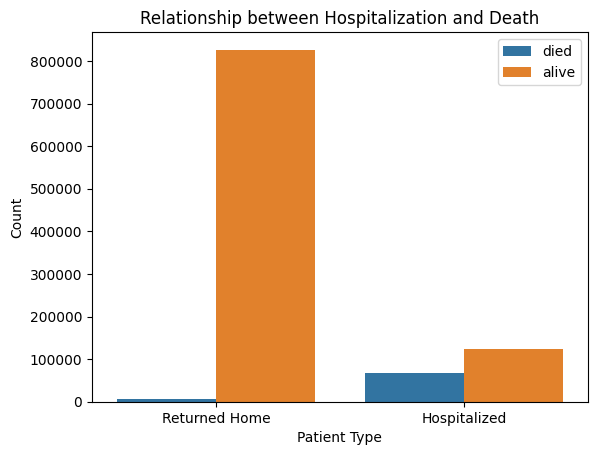

In [ ]:
sb.countplot(x='patient_type', hue='died', data=data[['patient_type', 'died']], saturation=0.75)
plt.title('Relationship between Hospitalization and Death')
plt.xlabel('Patient Type')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

In [ ]:
data.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died',
       'pneumonia', 'age', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'died'],
      dtype='object')

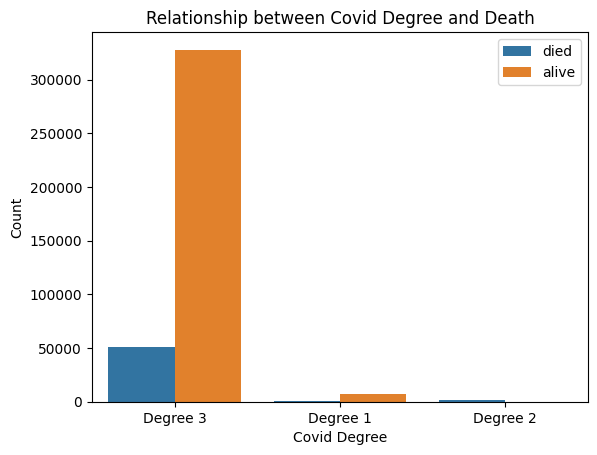

In [ ]:
covid_degree = data.loc[data['clasiffication_final'] != 'No Covid']
sb.countplot(x='clasiffication_final', hue='died', data=covid_degree[['clasiffication_final', 'died']], saturation=0.75)
plt.title('Relationship between Covid Degree and Death')
plt.xlabel('Covid Degree')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

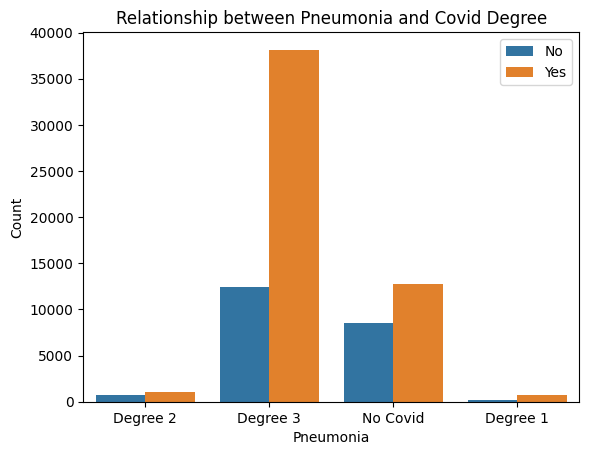

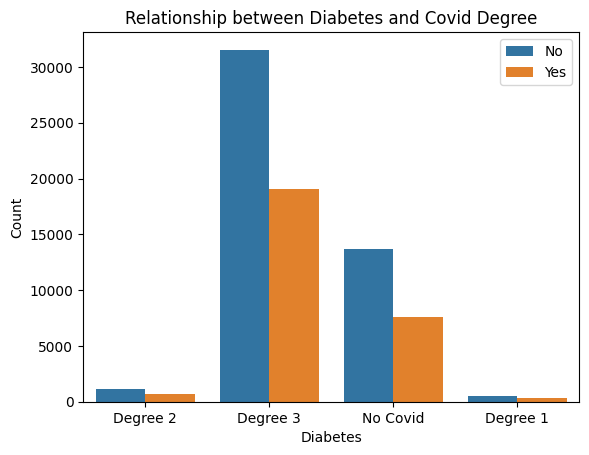

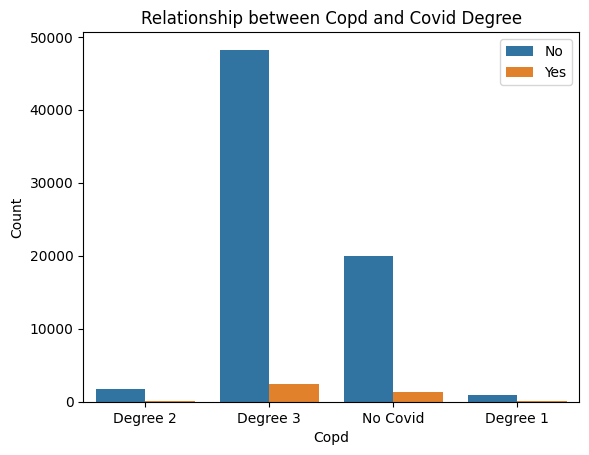

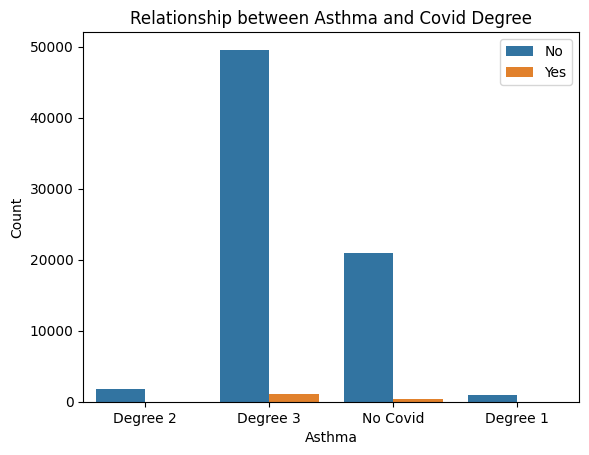

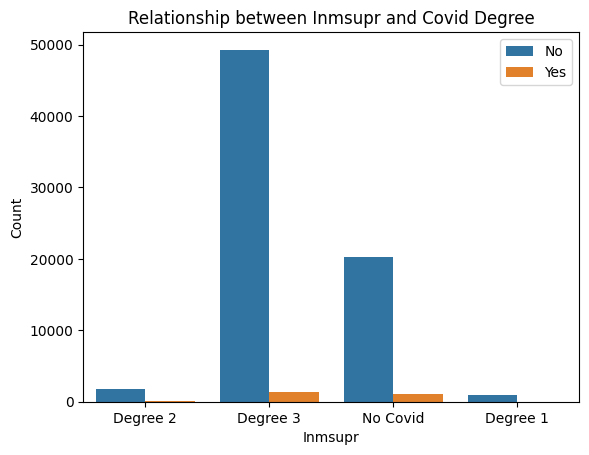

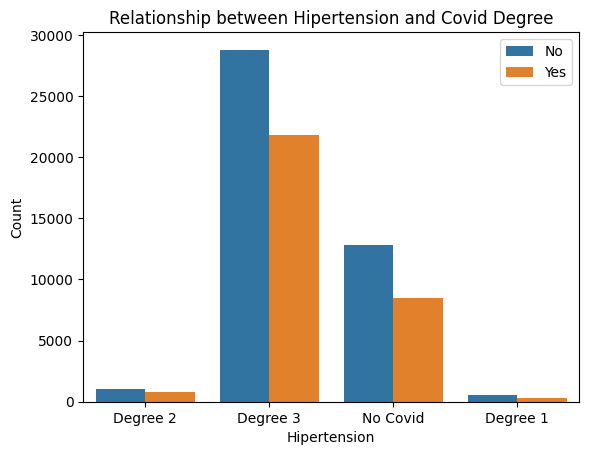

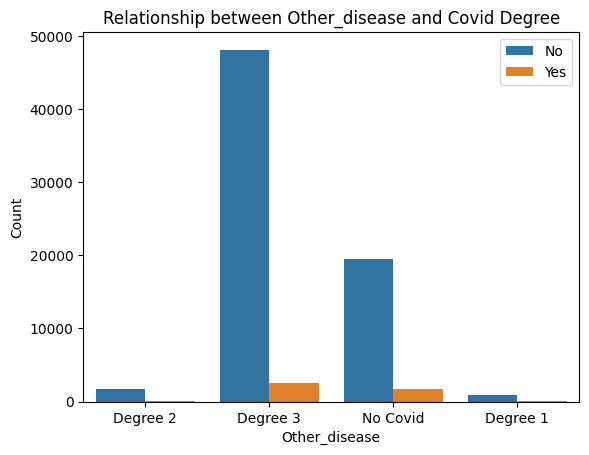

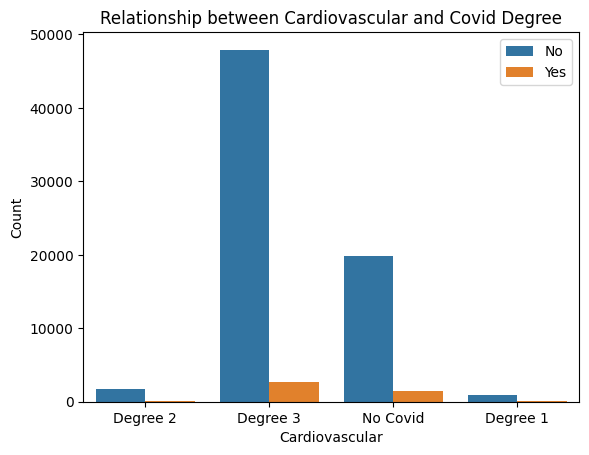

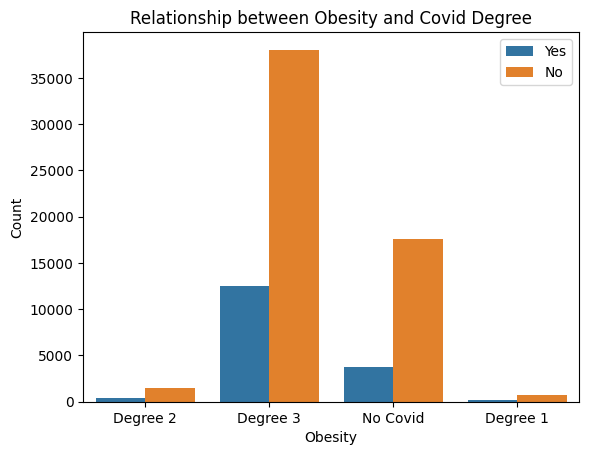

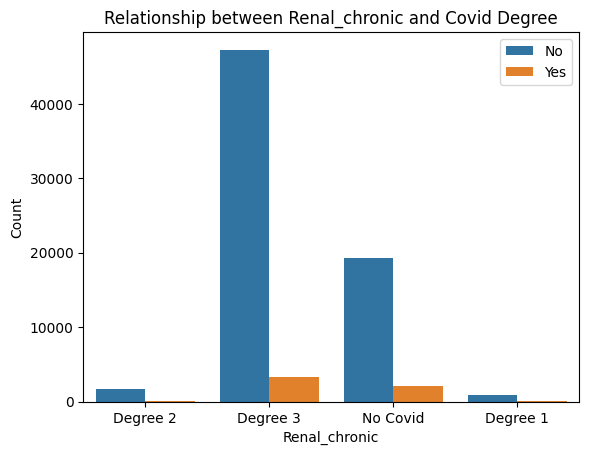

In [ ]:
# Relationship Between Death & Covid Degree & Existing Medical Conditions of Patients

columns = [
    'pneumonia', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
    'other_disease', 'cardiovascular', 'obesity', 'renal_chronic'
]

for col in columns:
  sb.countplot(x='clasiffication_final', hue=col, data=filtered_df[[col, 'clasiffication_final']], saturation=0.75)
  plt.title(f'Relationship between {col.capitalize()} and Covid Degree')
  plt.xlabel(f'{col.capitalize()}')
  plt.ylabel('Count')
  plt.legend(loc='upper right')
  plt.show()

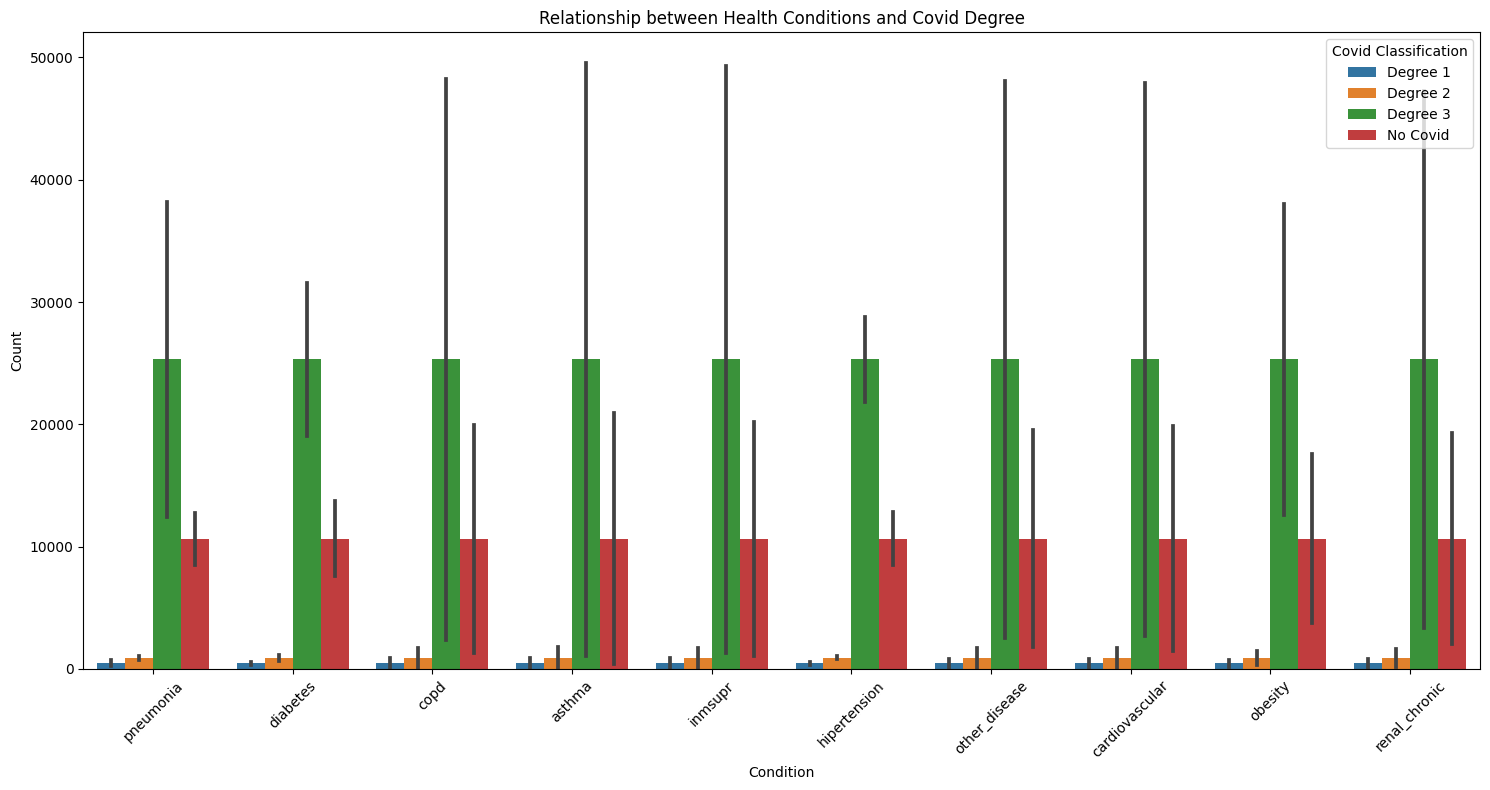

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Aggregate the data
agg_data = pd.DataFrame()
for col in columns:
    temp = filtered_df.groupby(['clasiffication_final', col]).size().reset_index(name='count')
    temp['Condition'] = col
    agg_data = pd.concat([agg_data, temp], ignore_index=True)

# Filter out rows where the condition is not present (assuming 0 means absent)
agg_data = agg_data[agg_data.iloc[:, 1] != 0]

# Create the count plot
sns.barplot(data=agg_data, x='Condition', y='count', hue='clasiffication_final', ax=ax)
plt.xticks(rotation=45)
plt.title("Relationship between Health Conditions and Covid Degree")
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Covid Classification', loc='upper right')
plt.tight_layout()
plt.show()



# Hypothesis Testing

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact

In [ ]:
data.head()

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,No,1,Female,Returned Home,03/05/2020,Yes,65.0,No,No,No,No,Yes,No,No,No,No,No,Degree 3,died
1,No,1,Male,Returned Home,03/06/2020,Yes,72.0,No,No,No,No,Yes,No,No,Yes,Yes,No,No Covid,died
2,No,1,Male,Hospitalized,09/06/2020,No,55.0,Yes,No,No,No,No,No,No,No,No,No,Degree 3,died
3,No,1,Female,Returned Home,12/06/2020,No,53.0,No,No,No,No,No,No,No,No,No,No,No Covid,died
4,No,1,Male,Returned Home,21/06/2020,No,68.0,Yes,No,No,No,Yes,No,No,No,No,No,Degree 3,died


1. Chi-Square Test of Independence or Association

In [ ]:
contingency_table1 = pd.crosstab(data['diabetes'], data['died'])
contingency_table2 = pd.crosstab(data['tobacco'], data['died'])

# Performing Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2)
print(contingency_table2)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

died      alive   died
tobacco               
No       873962  68216
Yes       76255   6396
Chi-Squared Statistic: 27.87829622756785
p-value: 1.2919081522619536e-07
Degrees of Freedom (DOF): 1
Expected Counts: [[873583.35158939  68594.64841061]
 [ 76633.64841061   6017.35158939]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table3 = pd.crosstab(data['pneumonia'], data['died'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table3)
print(contingency_table3)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

died        alive   died
pneumonia               
No         865459  21881
Yes         84758  52731
Chi-Squared Statistic: 227112.75721346383
p-value: 0.0
Degrees of Freedom (DOF): 1
Expected Counts: [[822737.79604207  64602.20395793]
 [127479.20395793  10009.79604207]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table4 = pd.crosstab(data['died'], data['clasiffication_final'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table4)
print(contingency_table4)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

clasiffication_final  Degree 1  Degree 2  Degree 3  No Covid
died                                                        
alive                     7548         0    327900    614769
died                       895      1799     50610     21308
Chi-Squared Statistic: 58405.27683032319
p-value: 0.0
Degrees of Freedom (DOF): 3
Expected Counts: [[7.82831295e+03 1.66802499e+03 3.50952829e+05 5.89767833e+05]
 [6.14687051e+02 1.30975009e+02 2.75571711e+04 4.63091668e+04]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table5 = pd.crosstab(data['tobacco'], data['clasiffication_final'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table5)
print(contingency_table5)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

clasiffication_final  Degree 1  Degree 2  Degree 3  No Covid
tobacco                                                     
No                        7721      1676    350818    581963
Yes                        722       123     27692     54114
Chi-Squared Statistic: 460.65416808086707
p-value: 1.6024543237575385e-99
Degrees of Freedom (DOF): 3
Expected Counts: [[7.76208407e+03 1.65391321e+03 3.47983707e+05 5.84778295e+05]
 [6.80915931e+02 1.45086789e+02 3.05262927e+04 5.12987046e+04]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table6 = pd.crosstab([data['sex'], data['diabetes']], data['died'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table6)
print(contingency_table6)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

died              alive   died
sex    diabetes               
Female No        438379  15275
       Yes        48076  11304
Male   No        417136  31672
       Yes        46626  16361
Chi-Squared Statistic: 55093.530142525036
p-value: 0.0
Degrees of Freedom (DOF): 3
Expected Counts: [[420626.01948032  33027.98051968]
 [ 55056.87823042   4323.12176958]
 [416132.82931689  32675.17068311]
 [ 58401.27297237   4585.72702763]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table7 = pd.crosstab([data['sex'], data['tobacco']], data['died'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table7)
print(contingency_table7)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

died             alive   died
sex    tobacco               
Female No       460392  25490
       Yes       26063   1089
Male   No       413570  42726
       Yes       50192   5307
Chi-Squared Statistic: 6770.396878792495
p-value: 0.0
Degrees of Freedom (DOF): 3
Expected Counts: [[450507.68117803  35374.31882197]
 [ 25175.21653271   1976.78346729]
 [423075.67041136  33220.32958864]
 [ 51458.4318779    4040.5681221 ]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table8 = pd.crosstab(data['cardiovascular'], data['clasiffication_final'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table8)
print(contingency_table8)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

clasiffication_final  Degree 1  Degree 2  Degree 3  No Covid
cardiovascular                                              
No                        8276      1717    370356    624398
Yes                        167        82      8154     11679
Chi-Squared Statistic: 188.3821481782821
p-value: 1.364845592231792e-40
Degrees of Freedom (DOF): 3
Expected Counts: [[8.27755550e+03 1.76374776e+03 3.71092921e+05 6.23612776e+05]
 [1.65444504e+02 3.52522401e+01 7.41707916e+03 1.24642241e+04]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
contingency_table9 = pd.crosstab(data['diabetes'], data['clasiffication_final'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table9)
print(contingency_table9)
print("Chi-Squared Statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of Freedom (DOF):", dof)
print("Expected Counts:", expected)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

clasiffication_final  Degree 1  Degree 2  Degree 3  No Covid
diabetes                                                    
No                        7323      1140    318651    575348
Yes                       1120       659     59859     60729
Chi-Squared Statistic: 9923.892683075454
p-value: 0.0
Degrees of Freedom (DOF): 3
Expected Counts: [[7.43488588e+03 1.58419516e+03 3.33315013e+05 5.60127906e+05]
 [1.00811412e+03 2.14804844e+02 4.51949868e+04 7.59490942e+04]]
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


2. Fisher's Exact Test

In [ ]:
ct_f1 = pd.crosstab(data['pneumonia'], data['sex'])

odds_ratio, p_value = fisher_exact(ct_f1)

print(ct_f1)
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

sex        Female    Male
pneumonia                
No         458191  429149
Yes         54843   82646
Odds Ratio: 1.6089371701198207
p-value: 0.0
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
ct_f2 = pd.crosstab(data['tobacco'], data['sex'])

odds_ratio, p_value = fisher_exact(ct_f2)

print(ct_f2)
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

sex      Female    Male
tobacco                
No       485882  456296
Yes       27152   55499
Odds Ratio: 2.1765441538060113
p-value: 0.0
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
ct_f3 = pd.crosstab(data['sex'], data['died'])

odds_ratio, p_value = fisher_exact(ct_f3)

print(ct_f3)
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

died     alive   died
sex                  
Female  486455  26579
Male    463762  48033
Odds Ratio: 1.8956082337297127
p-value: 0.0
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.


In [ ]:
ct_f4 = pd.crosstab(data['cardiovascular'], data['died'])

odds_ratio, p_value = fisher_exact(ct_f4)

print(ct_f4)
print("Odds Ratio:", odds_ratio)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.")
else:
    print("Fail to reject the null hypothesis. Thus, we conclude that: There is no significant relationship between these two categorical variables.")

died             alive   died
cardiovascular               
No              934417  70330
Yes              15800   4282
Odds Ratio: 3.60072280766801
p-value: 0.0
Reject the null hypothesis. Thus, we conclude that: There is significant association between these two categorical variables.



# Predictive Modeling

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Drop the date-died column as it is not significant for the analysis
df_model = data.drop(columns='date_died')

In [ ]:
cat_cols = df_model.select_dtypes(include=['object']).columns.to_list()
cat_cols

['usmer',
 'sex',
 'patient_type',
 'pneumonia',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'clasiffication_final',
 'died']

In [ ]:
df_model['died'].isnull().sum()
data_arc = df_model.copy()

In [ ]:
# Create dummy variables for categorical variables
enc = OneHotEncoder(drop='first')
encoded_cols = enc.fit_transform(df_model[cat_cols]).toarray()
columns = enc.get_feature_names_out()

encoded_data = pd.DataFrame(encoded_cols, columns=columns)

In [ ]:
# Reset the index of data before joining the encoded data
# to avoid NULL values due to differences in index
df_model.reset_index(drop=True, inplace=True)

# Drop the Categorical Columns
df_model.drop(columns=cat_cols, inplace=True)
df_model = df_model.join(encoded_data)

In [ ]:
df_model.head()
df_model.isnull().sum()

medical_unit                     0
age                              0
usmer_Yes                        0
sex_Male                         0
patient_type_Returned Home       0
pneumonia_Yes                    0
diabetes_Yes                     0
copd_Yes                         0
asthma_Yes                       0
inmsupr_Yes                      0
hipertension_Yes                 0
other_disease_Yes                0
cardiovascular_Yes               0
obesity_Yes                      0
renal_chronic_Yes                0
tobacco_Yes                      0
clasiffication_final_Degree 2    0
clasiffication_final_Degree 3    0
clasiffication_final_No Covid    0
died_died                        0
dtype: int64

In [ ]:
index_diff_count = (df_model.index != encoded_data.index).sum()
print(f"Number of index differences: {index_diff_count}")

Number of index differences: 0


In [ ]:
df_model.head()

,medical_unit,age,usmer_Yes,sex_Male,patient_type_Returned Home,pneumonia_Yes,diabetes_Yes,copd_Yes,asthma_Yes,inmsupr_Yes,hipertension_Yes,other_disease_Yes,cardiovascular_Yes,obesity_Yes,renal_chronic_Yes,tobacco_Yes,clasiffication_final_Degree 2,clasiffication_final_Degree 3,clasiffication_final_No Covid,died_died
0,1,65.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,72.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,1,55.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1,53.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1,68.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# 2. Get feature matrix X, and target variable y
y = df_model['died_died']
X = df_model.drop(columns='died_died')

# 3. Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4. Normalize data using MinMaxScaler
scaler = MinMaxScaler()
scaled_train_X = scaler.fit_transform(X_train)
scaled_test_X = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [2000]}
lr_random_search = RandomizedSearchCV(
    LogisticRegression(),
    lr_params,
    scoring='accuracy',
    verbose=2,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)
lr_random_search.fit(scaled_train_X, y_train)

# Get the best model and its parameters
lr_model = lr_random_search.best_estimator_
lr_best_params = lr_random_search.best_params_
print('Logistic Regression Model:', lr_model)
print('Best Parameters:\n', lr_best_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Logistic Regression Model: LogisticRegression(C=100, max_iter=2000)
Best Parameters:
 {'max_iter': 2000, 'C': 100}


In [ ]:
# Decision Trees
# Define hyperparameter grid
dt_param_dist = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}

dt_random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    dt_param_dist,
    scoring='accuracy',
    verbose=2,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)
dt_random_search.fit(scaled_train_X, y_train)

# Get the best model and its parameters
dt_model = dt_random_search.best_estimator_
dt_best_params = dt_random_search.best_params_
print('Decision Tree Model:', dt_model)
print('Best Parameters:\n', dt_best_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Decision Tree Model: DecisionTreeClassifier(max_depth=10, min_samples_split=10)
Best Parameters:
 {'min_samples_split': 10, 'max_depth': 10}


In [ ]:
from scipy.stats import uniform

# Define the hyperparameter grid for the randomized search
svm_param_dist = {
    'C': uniform(loc=0, scale=10),  # C is the regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization term
    'dual': [False, True],  # Dual formulation (False for n_samples > n_features)
    'fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Create a RandomizedSearchCV instance
svm_random_search = RandomizedSearchCV(
    LinearSVC(),
    param_distributions=svm_param_dist,
    scoring='accuracy',
    verbose=2,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model with the training data
svm_random_search.fit(scaled_train_X, y_train)

# Get the best model and its parameters
svm_model = svm_random_search.best_estimator_
svm_best_params = svm_random_search.best_params_
print('Linear SVC Model:', svm_model)
print('Linear SVC Model Best Parameters:\n', svm_best_params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, l

Linear SVC Model: LinearSVC(C=3.745401188473625, dual=False, penalty='l1')
Linear SVC Model Best Parameters:
 {'C': 3.745401188473625, 'dual': False, 'fit_intercept': True, 'penalty': 'l1'}


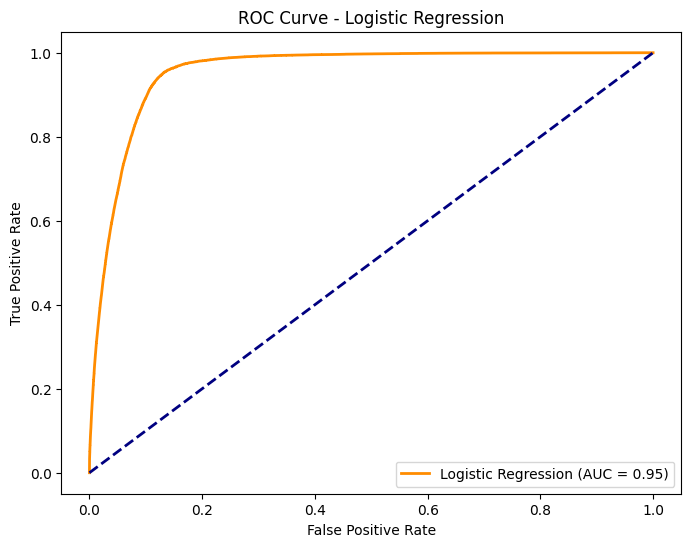

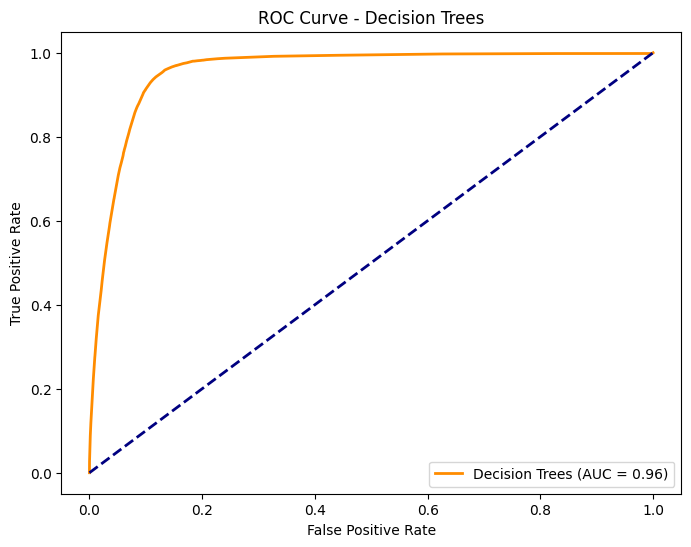

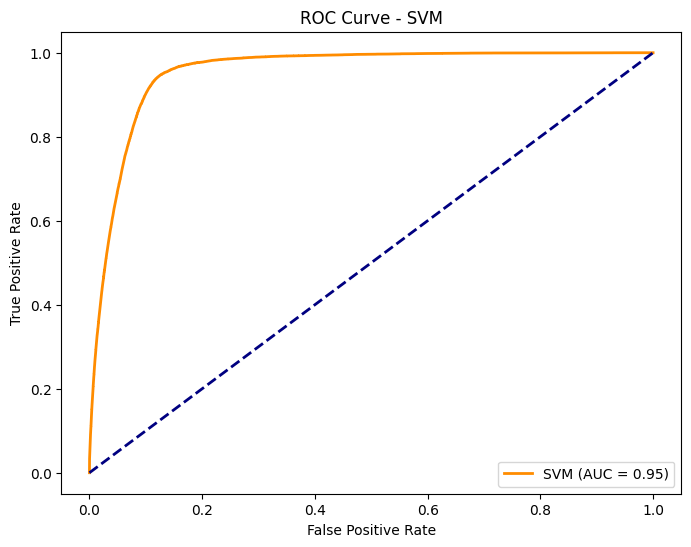

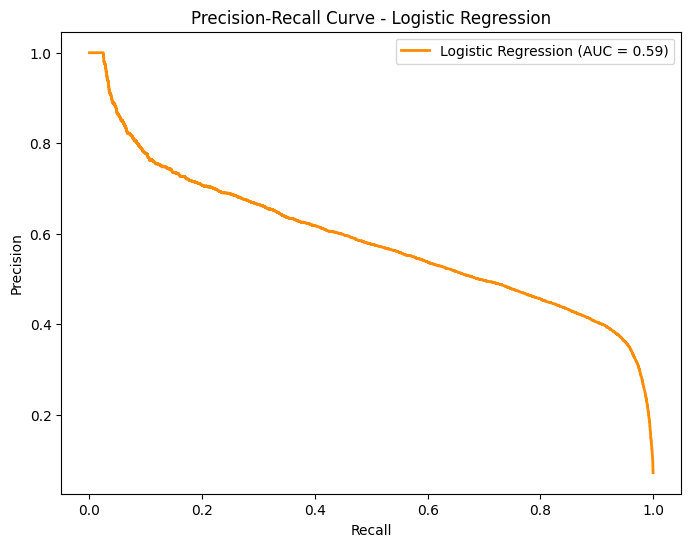

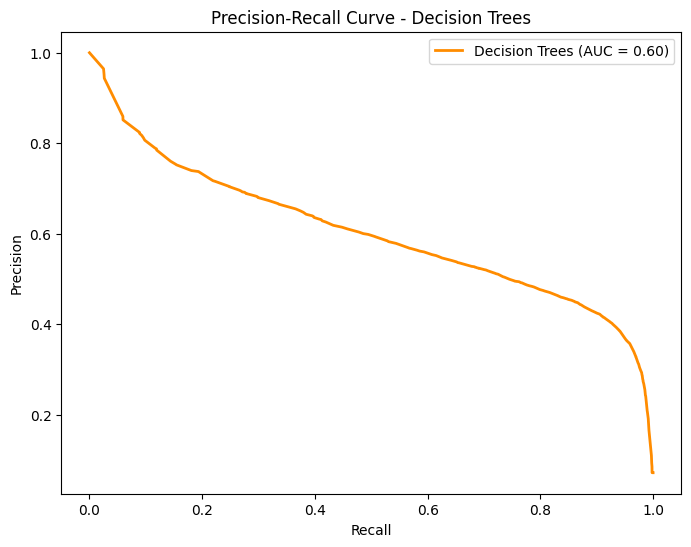

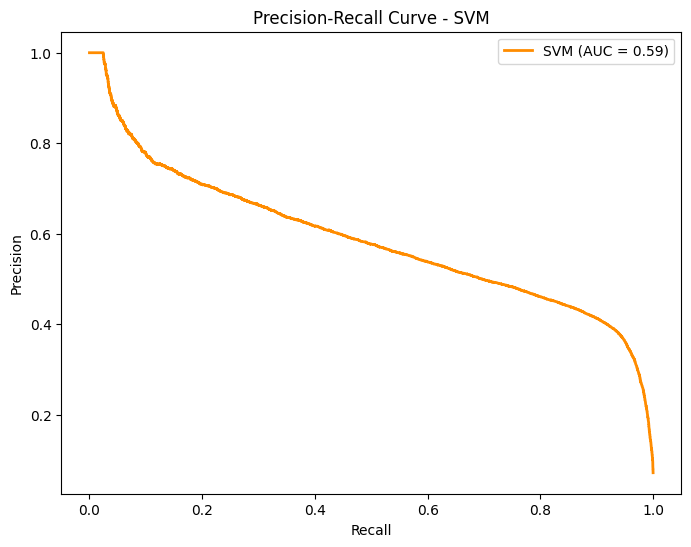

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, roc_auc_score

# Define a function to plot ROC curve
def plot_roc_curve(y_true, y_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Define a function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_probs, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc='upper right')
    plt.show()

# Assuming you have probabilities for each class from each model
lr_probs = lr_model.predict_proba(scaled_test_X )[:, 1]
dt_probs = dt_model.predict_proba(scaled_test_X )[:, 1]
svm_probs = svm_model.decision_function(scaled_test_X )  # For SVM, decision_function gives decision values

# Plot ROC curves
plot_roc_curve(y_test, lr_probs, 'Logistic Regression')
plot_roc_curve(y_test, dt_probs, 'Decision Trees')
plot_roc_curve(y_test, svm_probs, 'SVM')

# Plot Precision-Recall curves
plot_precision_recall_curve(y_test, lr_probs, 'Logistic Regression')
plot_precision_recall_curve(y_test, dt_probs, 'Decision Trees')
plot_precision_recall_curve(y_test, svm_probs, 'SVM')

It can be observed that the precision and recall scores of the model are not despite very high accuracy. This implies that there is a significant class imbalance in the dataset and the model is biased towards the majority class whereas we are interested in predicting the minority class

In [ ]:
## Handling Class Imbalance Using SMOTE
from imblearn.over_sampling import SMOTE

# Create a SMOTE instance
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_balanced, y_train_balanced = smote.fit_resample(scaled_train_X, y_train)

In [ ]:
# Logistic Regression
lr_random_search_sm = RandomizedSearchCV(
    LogisticRegression(),
    lr_params,
    scoring='accuracy',
    verbose=2,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)
lr_random_search_sm.fit(X_train_balanced, y_train_balanced)

# Get the best model and its parameters
lr_model_sm = lr_random_search_sm.best_estimator_
lr_best_params_sm = lr_random_search_sm.best_params_
print('Logistic Regression Model:', lr_model_sm)
print('Best Parameters:\n', lr_best_params_sm)

# Decision Trees
# Define hyperparameter grid
dt_random_search_sm = RandomizedSearchCV(
    DecisionTreeClassifier(),
    dt_param_dist,
    scoring='accuracy',
    verbose=2,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)
dt_random_search_sm.fit(X_train_balanced, y_train_balanced)

# Get the best model and its parameters
dt_model_sm = dt_random_search_sm.best_estimator_
dt_best_params_sm = dt_random_search_sm.best_params_
print('Decision Tree Model:', dt_model_sm)
print('Best Parameters:\n', dt_best_params_sm)

# Create a RandomizedSearchCV instance
svm_random_search_sm = RandomizedSearchCV(
    LinearSVC(),
    param_distributions=svm_param_dist,
    scoring='accuracy',
    verbose=2,
    n_iter=5,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model with the training data
svm_random_search_sm.fit(X_train_balanced, y_train_balanced)

# Get the best model and its parameters
svm_model_sm = svm_random_search_sm.best_estimator_
svm_best_params_sm = svm_random_search_sm.best_params_
print('Linear SVC Model:', svm_model_sm)
print('Linear SVC Model Best Parameters:\n', svm_best_params_sm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Logistic Regression Model: LogisticRegression(C=100, max_iter=2000)
Best Parameters:
 {'max_iter': 2000, 'C': 100}
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Decision Tree Model: DecisionTreeClassifier()
Best Parameters:
 {'min_samples_split': 2, 'max_depth': None}
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1223, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, l

Linear SVC Model: LinearSVC(C=1.5599452033620265, dual=False)
Linear SVC Model Best Parameters:
 {'C': 1.5599452033620265, 'dual': False, 'fit_intercept': True, 'penalty': 'l2'}


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Logistic Regression
lr_pred = lr_model_sm.predict(scaled_test_X)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred)


print("Logistic Regression Metrics:")
print(f'Accuracy: {lr_accuracy}')
print(f'Classification Report: \n{lr_report}')
print(f'ROC AUC Score: {lr_roc_auc}')
print("\n")

# Decision Trees
dt_pred = dt_model_sm.predict(scaled_test_X)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

print("Decision Trees Metrics:")
print(f'Accuracy: {dt_accuracy}')
print(f'Classification Report: \n{dt_report}')
print(f'ROC AUC Score: {dt_roc_auc}')
print("\n")

# SVM
svm_pred = svm_model_sm.predict(scaled_test_X)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

print("SVM Metrics:")
print(f'Accuracy: {svm_accuracy}')
print(f'Classification Report: \n{svm_report}')
print(f'ROC AUC Score: {svm_roc_auc}')

Logistic Regression Metrics:
Accuracy: 0.8938557734340848
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94    237786
         1.0       0.40      0.92      0.56     18422

    accuracy                           0.89    256208
   macro avg       0.70      0.91      0.75    256208
weighted avg       0.95      0.89      0.91    256208

ROC AUC Score: 0.9064850320985235


Decision Trees Metrics:
Accuracy: 0.9178245800287267
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96    237786
         1.0       0.45      0.62      0.52     18422

    accuracy                           0.92    256208
   macro avg       0.71      0.78      0.74    256208
weighted avg       0.93      0.92      0.92    256208

ROC AUC Score: 0.7818851966971397


SVM Metrics:
Accuracy: 0.8881689876974957
Classification Report: 
              precision    recall  f1-score   sup

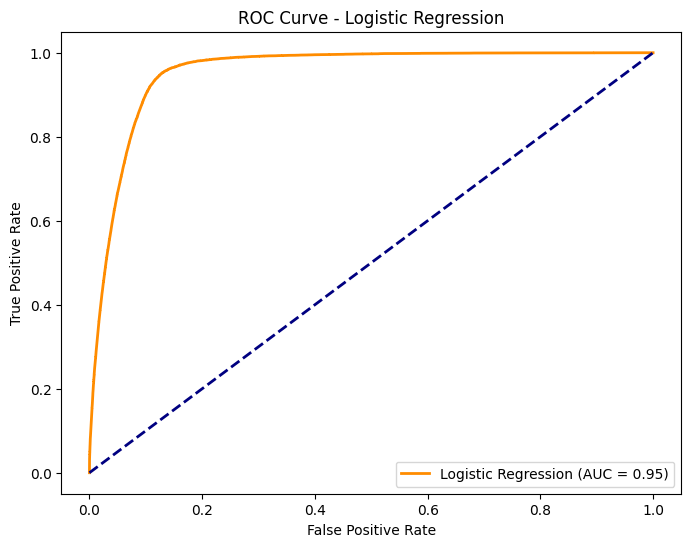

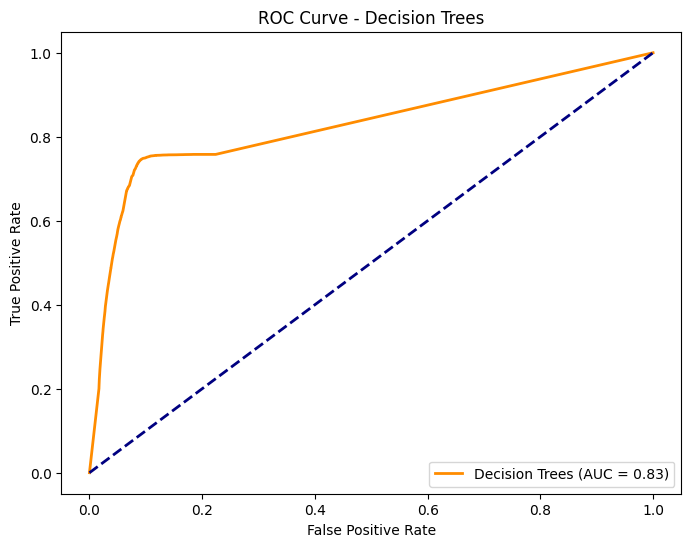

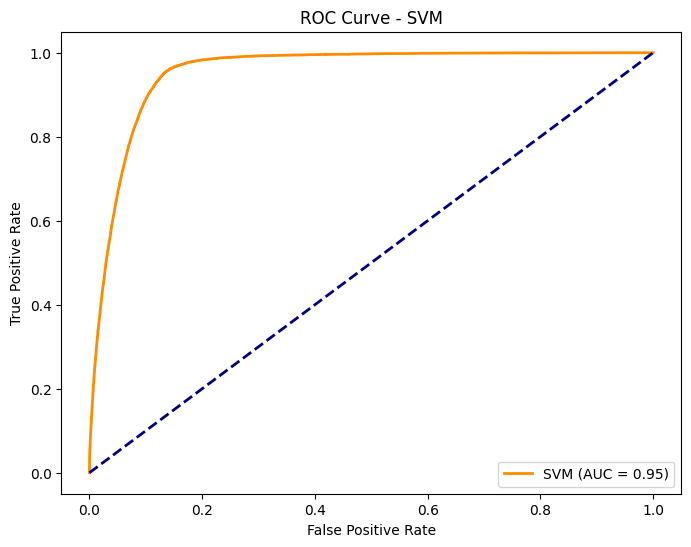

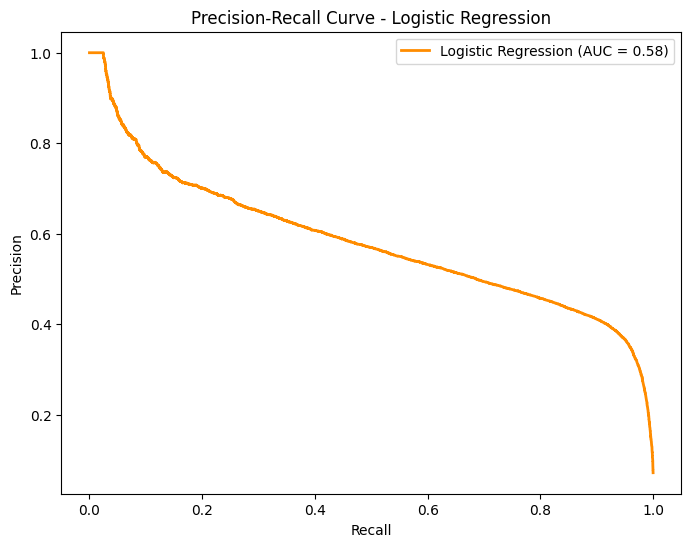

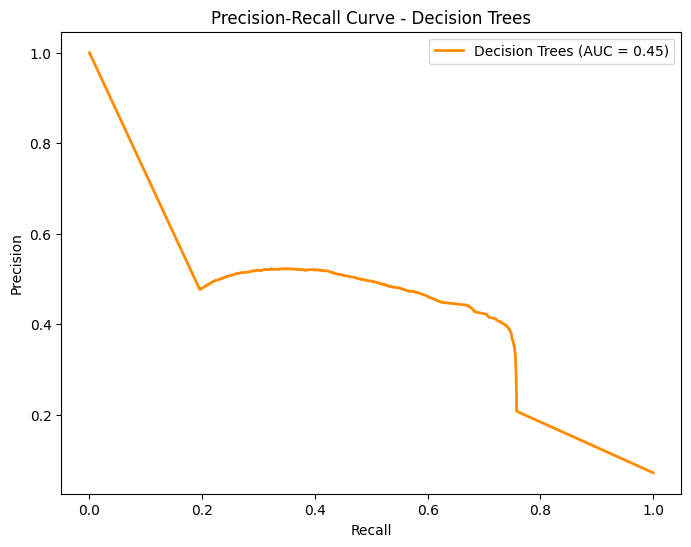

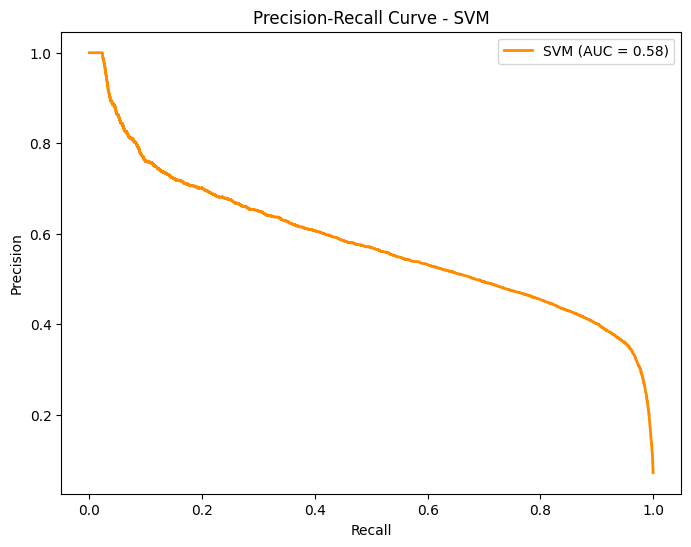

In [ ]:
# Assuming you have probabilities for each class from each model
lr_probs = lr_model_sm.predict_proba(scaled_test_X )[:, 1]
dt_probs = dt_model_sm.predict_proba(scaled_test_X )[:, 1]
svm_probs = svm_model_sm.decision_function(scaled_test_X )  # For SVM, decision_function gives decision values

# Plot ROC curves
plot_roc_curve(y_test, lr_probs, 'Logistic Regression')
plot_roc_curve(y_test, dt_probs, 'Decision Trees')
plot_roc_curve(y_test, svm_probs, 'SVM')

# Plot Precision-Recall curves
plot_precision_recall_curve(y_test, lr_probs, 'Logistic Regression')
plot_precision_recall_curve(y_test, dt_probs, 'Decision Trees')
plot_precision_recall_curve(y_test, svm_probs, 'SVM')

In [ ]:
# If you want p-values, you can use statsmodels
import statsmodels.api as sm

# Assuming 'X_train' is your feature matrix and 'y_train' is your target variable
X_train_const = sm.add_constant(scaled_train_X)
logit_model = sm.Logit(y_train, X_train_const)

# Fit the model
result = logit_model.fit(maxiter=lr_model_sm.max_iter)  # Using the max_iter from the best model

# Access coefficients and p-values
coefficients_statsmodels = result.params
p_values = result.pvalues
print(result.summary())

         Current function value: 0.131418
         Iterations: 2000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:              died_died   No. Observations:               768621
Model:                          Logit   Df Residuals:                   768601
Method:                           MLE   Df Model:                           19
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.4976
Time:                        20:29:08   Log-Likelihood:            -1.0101e+05
converged:                      False   LL-Null:                   -2.0107e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4276      0.060    -56.656      0.000      -3.546      -3.309
x1            -0.9143      0.020    -46.874      0.000      -0.953      -0.876
x2             5.1269      0.048    107.071      0.0

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


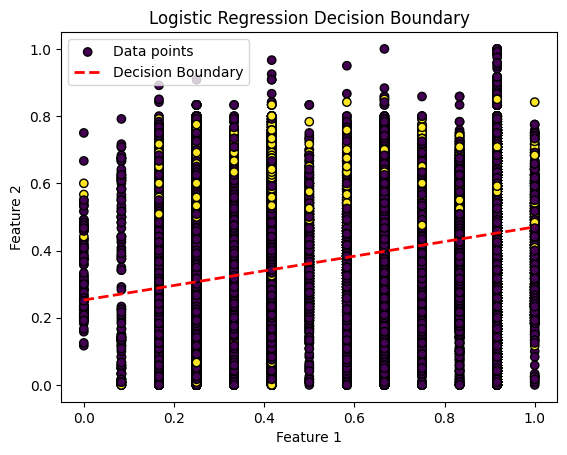

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'X_train' is your feature matrix
# Assuming 'best_logreg_model' is your fitted logistic regression model

# Extract coefficients and intercept
coefficients = lr_model_sm.coef_[0]
intercept = lr_model_sm.intercept_[0]

# Plot decision boundary
x_decision_boundary = np.linspace(np.min(scaled_train_X), np.max(scaled_train_X), 100)
y_decision_boundary = -(intercept + coefficients[0] * x_decision_boundary) / coefficients[1]

plt.scatter(scaled_train_X[:, 0], scaled_train_X[:, 1], c=y_train, cmap='viridis', edgecolors='k', marker='o', label='Data points')
plt.plot(x_decision_boundary, y_decision_boundary, color='red', linestyle='dashed', linewidth=2, label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

In [ ]:
lr_model_sm.coef_

array([[-1.32877895,  6.10539845,  0.09889873,  0.55529917, -2.85420945,
         1.57223087,  0.37566557, -0.19426258, -0.47262932,  0.37569654,
         0.0628429 ,  0.30948299, -0.1744288 ,  0.24623057,  0.565859  ,
        -0.27122878, 17.84309651,  0.19572006, -0.60399723]])